In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Generate plots for paper
The plots in this notebook come from two main parameter sweep studies using the radheat, thermint, and eqtide modules: 
1. A high-resolution parameter sweep over planet mass and eccentricity. 
2. A low-resolution parameter sweep over planet mass, eccentricity, and the viscosity activation energy (of the mantle). 

Each of these two parameter sweep studies was done in two parts (one per each planet), so as not to compute duplicate runs for the same set of parameters. The results of each set of runs, along with the files used to generate them, are in the following directories (the directories with the complete runs are ~2-3 GB each, so may not be uploaded to GitHub depending on their upload limits. However, they can be re-run using the files in each folder. I will also include summary files as *pkls in this directory, so the plots can be re-made without re-running the integrations. 

For all run in this section, the parameter ranges under consideration are as follows:
1. Planet mass. For both planets, masses within 1$\sigma$ of the central value from Delrez et al 2022 were considered. This is a range of (1.6, 4.0) Earth masses for planet b, and (1.7, 4.3) Earth masses for planet c. For the final high-res figure of planet c's tidal heating, we consider the 2$\sigma$ mass limits (0.9 to 6.1 $M_{\oplus}$).
2. Eccentricity. Initial eccentricities between 0 and 0.3 were considered for both planets. This limit is fairly unrestrictive, and was determined by allowing all orbits that do not cause initial orbit-crossing (assuming both planets have the same initial eccentricity). It is likely that the initial eccentricities will be on the lower end of this range.  For the high-res figure of planet c, we do run up to $e=0.7$ just to see what happens. 
3. Viscosity activiation energy. Values between 2.75e5 and 2.5e5 were considered for both planets. The ficucial case had a value of 3e5, the same as Earth's nominal value. Each value of the viscosity activation energy gives a different initial tidal Q for the planet, and the initial values were chosen so that these tidal Qs vary between 10 and 200. (According to Goldreich's 1966 "Q in the Solar System", the solar system terrestrial planets are somewhere in the range 10-190, with Mercury's upper limit being the 190 ceiling). 


In [148]:
source_files_available = True # set to False if you don't have the *forward files for each case, and the
                              # plots will be generated with the summary files only. 

    ## colors for plots
blue_col ="#3772FF"
orange_col = "#EE6C4D"

In [160]:
# Read in the default run.
filepath = "" # run results are located in folder /TidalEarth, which is default path

names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
         'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
    'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
    'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
    'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
     'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
    'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock', "TidalQ", "SurfEnFluxTotal", 'dShModRef', 'dViscRef']

# for the representative plots, take a typical draw with typical parameters, and plot that. 
# On my local machine where all the folders are there, I will do this by:
#datab_global = pd.read_csv("ParameterSweep_dec8/test_bmass2_becc2_bvisc0/"+ "tidalearth.b.forward", names=names, delim_whitespace=True)
#datac_global = pd.read_csv("ParameterSweep_dec8c/test_bmass4_becc2_bvisc3/" + "tidalearth.c.forward", names=names, delim_whitespace=True)

# For code pushed to GitHub, where those directories are too large to push, I relocated the needed files:
datab_global = pd.read_csv("DataSummaryFiles/test_bmass2_becc2_bvisc0/"+ "tidalearth.b.forward", names=names, delim_whitespace=True)
datac_global = pd.read_csv("DataSummaryFiles/test_bmass4_becc2_bvisc3/" + "tidalearth.c.forward", names=names, delim_whitespace=True)


## Figure A

The purpose of this figure is to show the evolution for a fiducial case of the system. The planetary parameters come from [the discovery paper](https://arxiv.org/abs/2209.02831). The integrations presented as the fiducial case come from the larger set of integrations, and are meant to qualitatively show what the typical behavior looks like. 


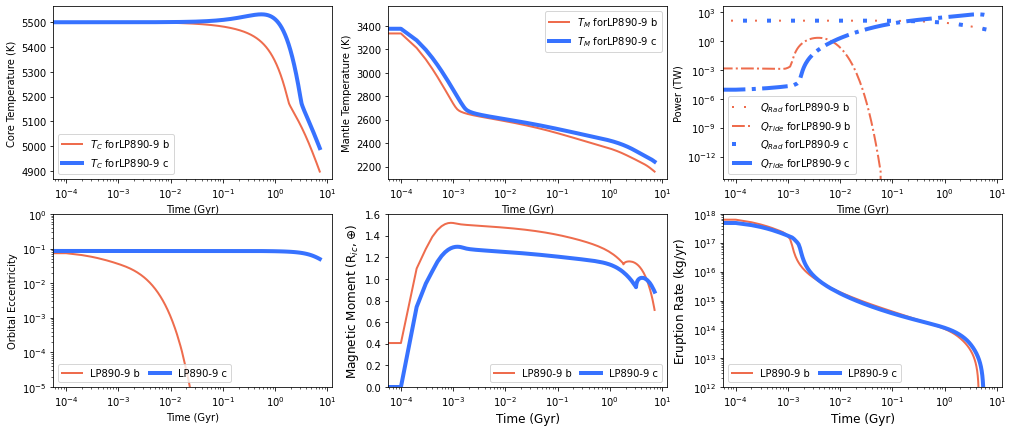

In [161]:
# This cell is adapted from makeplot.py, the script that Rory provided in the default folder. 
# There are a few aesthetic changes. 

colz = [orange_col, blue_col]
planetid = ["LP890-9 b", "LP890-9 c"]
widthz = [2,4]
filez = [datab_global, datac_global]
s_yr = 3600.*24*365

for i, item in enumerate(filez):
    data = filez[i]
    fig = plt.figure(1, figsize=(17,7))
    panel=1
    rows = 2
    cols = 3
    color = colz[i]
    plt.subplot(rows,cols,panel) ## plot the core temperatures first
    plt.plot(data['Time'],data['TCore'],'-',color=color,label=r'$T_{C}$ for' + planetid[i], linewidth = widthz[i])
    plt.legend(loc='best',frameon=True)
    plt.ylabel('Core Temperature (K)')
    plt.xlabel('Time (Gyr)')
    plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['TMan'],linestyle='-',color=color,label=r'$T_{M}$ for' + planetid[i],linewidth = widthz[i])
    plt.legend(loc='best',frameon=True)
    plt.ylabel('Mantle Temperature (K)')
    plt.xlabel('Time (Gyr)')
    plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['RadPowerTotal'],linestyle=(0, (1, 5)),color=color,label=r'$Q_{Rad}$ for' + planetid[i],linewidth = widthz[i])
    plt.plot(data['Time'],data['PowerEqtide'],'-.',color=color,label=r'$Q_{Tide}$ for' + planetid[i],linewidth = widthz[i])
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(loc='best',frameon=True,columnspacing=2)
    plt.ylabel('Power (TW)')
    plt.xlabel('Time (Gyr)')
    ymax=1e10
    panel += 1
#    plt.subplot(rows,cols,panel)
#    plt.plot(data['Time'],data['SemiMajorAxis'],color=color,label='$a_0$=%.2f'%data['SemiMajorAxis'].values[0])
#    plt.ylabel(r'Semi-Major Axis (AU)')
#    plt.xlabel('Time (Gyr)')
#    plt.ylim(0,0.10)
#    plt.xscale('log')
#    plt.legend(frameon=True,loc='upper left')

    plt.subplot(rows,cols,panel)
    plt.loglog(data['Time'],data['Eccentricity'],color=color,label=planetid[i],linewidth = widthz[i])
    plt.legend(loc='lower left',frameon=True,ncol=2,columnspacing=1)
    plt.ylabel(r'Orbital Eccentricity')
    plt.xlabel('Time (Gyr)')
    plt.ylim(1e-5,1)
    plt.yscale('log'); plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],data['MagMom'],color=color,label=planetid[i],linewidth = widthz[i])
    #plt.plot(data['Time'],data['RIC']/3481,color=color,linestyle='--')
    plt.ylim(0,1.6)
    plt.ylabel('Magnetic Moment (R$_{ic}$, $\oplus$)', fontsize = 12)
    plt.xlabel('Time (Gyr)', fontsize = 12)
    plt.legend(loc='lower right',frameon=True,ncol=2,columnspacing=1)

    plt.xscale('log')
    panel += 1
    plt.subplot(rows,cols,panel)
    plt.plot(data['Time'],0.2 * data['MeltMassFluxMan']*s_yr,label=planetid[i],color=color,linewidth = widthz[i])
    plt.ylabel(r'Eruption Rate (kg$/$yr)', fontsize = 12)
    plt.xlabel('Time (Gyr)', fontsize = 12)
    plt.ylim(1e12,1e18)
    plt.legend(loc='lower left',frameon=True,ncol=2,columnspacing=1)

    plt.yscale('log'); plt.xscale('log')
plt.savefig("Figures/thermmag_figure1.png", dpi = 150, bbox_inches = 'tight')

### Figure caption:

For a fiducial case, we show the evolution of various physical parameters for LP 980-9 b and b. The integrations were run using the EqTide, ThermInt, and RadHeat modules. Both fiducial integrations are representative cases from the larger integration set presented in Figure \ref{thermint_fig2}, with the viscosity activation energies of $A_{v, b} = 2.9\cdot 10^{5}$ and $A_{v, c} = 3.1\cdot 10^{5}$ chosen so that both planets have approximately equal initial tidal $Q \approx 30$. Both planets have initial eccentricities of $e\sim0.1$, and masses of $m_{b} = 2.3 m_{\oplus}$ and $m_{b} = 2.9 m_{\oplus}$. The interior structures of both planets are otherwise assumed to be Earth-like. Throughout the integration, LP 980-9 c has a consistently higher core temperature and generally has a higher mantle temperature than LP 980-9 b. In the upper right panel, we see that LP 980-9 b's internal heat budget is driven by radiogenic heating for the full integration lifetime, while LP 980-9 c has a significant contribution from tidal heating which increases in total power as its orbital eccentricity begins to decay (bottom left panel) by the end of the integration. Both planets have non-zero magnetic moments for the majority of the integration, and experience declining eruption rates as the planets age. 



This next cells reads in the results from the vplanet run. It takes a little while to run, so if you generate the data_summary data frame, it might be a good idea to save it to a pickle.


In [163]:
# recreate that, but monte carlo it for some reasonable range in starting parameters. 

### plot the blue line (planet b)

## read in and plot alpha lines 

if source_files_available == False:
    data_summary = pd.DataFrame()

    infofile = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_dec8c/grid_list.dat", delim_whitespace = True)
    for item in infofile['trial'].unique():
        try:
            names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
                 'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
            'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
            'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
            'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
             'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
            'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock', "TidalQ", "SurfEnFluxTotal"]
            idx = (infofile['trial'] == item)
            datac = pd.read_csv("ParameterSweep_dec8c/test_" + item + "/tidalearth.c.forward", names=names, delim_whitespace=True)
            data_summary = data_summary.append({'time': datac['Time'].values, "file": item,  "y": datac['RadPowerTotal'].values / (datac['PowerEqtide'].values + datac['RadPowerTotal'].values), 
                                                'color': 'orange', 'planet':"c",
                                                'last_value': np.asarray(datac['RadPowerTotal'].values / (datac['PowerEqtide'].values + datac['RadPowerTotal'].values))[-1]},
                                              ignore_index = True)
        except FileNotFoundError:
            pass


    ### plot the blue lines (planet b)
    infofile = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_dec8/grid_list.dat", delim_whitespace = True)
    for item in infofile['trial'].unique():
        try:
            names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
                 'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
            'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
            'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
            'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
             'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
            'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock', "TidalQ", "SurfEnFluxTotal"]
            idx = (infofile['trial'] == item)
            datab = pd.read_csv("ParameterSweep_dec8/test_" + item + "/tidalearth.b.forward", names=names, delim_whitespace=True)
            data_summary = data_summary.append({'time': datab['Time'].values, "file": item, "y": datab['RadPowerTotal'].values / (datab['PowerEqtide'].values + datab['RadPowerTotal'].values), 
                                                'color': 'MediumBlue', 'planet':"b",
                                                'last_value': np.asarray(datab['RadPowerTotal'].values / (datab['PowerEqtide'].values + datab['RadPowerTotal'].values))[-1]},
                                              ignore_index = True)
        except FileNotFoundError:
            pass

    data_summary.to_pickle("DataSummaryFiles/heating_comparison_summary.pkl")

else: 
    data_summary = pd.read_pickle("DataSummaryFiles/heating_comparison_summary.pkl")
    print("File read in")


File read in


# Figure B: 


/Users/jcbecker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/jcbecker/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


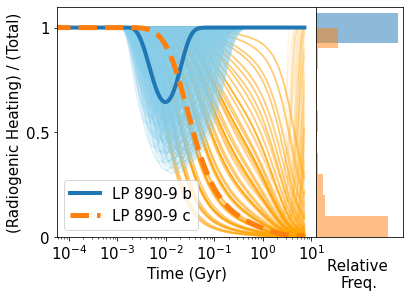

In [152]:
# the line to add to check over viscosity too (add to VSPACE.in) :dActViscMan [300000, 350000, n5] bvisc
# Start with a square Figure.
#data_summary.to_pickle("radiogenicheating.pkl")
#data_summary = pd.read_pickle("radiogenicheating.pkl")
fig = plt.figure(figsize=(6, 4))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(1, 2,  width_ratios=(3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.0, hspace=0.0)
# Create the Axes.
ax = fig.add_subplot(gs[0, 0])
ax.set_yticks([0,.5, 1],[0, .5, 1])

# Draw the scatter plot and marginals.

    
idx2 = (data_summary['planet'] == "c")
for i, item in enumerate(data_summary.loc[idx2]['time']):
    plt.plot(data_summary.loc[idx2]['time'].values[i], data_summary.loc[idx2]['y'].values[i], alpha = 0.1, color = "Orange")

idx = (data_summary['planet'] == "b")
for i, item in enumerate(data_summary.loc[idx]['time']):
    plt.plot(data_summary.loc[idx]['time'].values[i], data_summary.loc[idx]['y'].values[i], alpha = 0.3, color = "SkyBlue")

plt.xscale("log")

datab_global = pd.read_csv("DataSummaryFiles/test_bmass3_becc5_bvisc3/"+ "tidalearth.b.forward", names=names, delim_whitespace=True)
datac_global = pd.read_csv("DataSummaryFiles/test_bmass3_becc5_bvisc3/" + "tidalearth.c.forward", names=names, delim_whitespace=True)

### add the global models
plt.plot(datab_global['Time'].values, datab_global['RadPowerTotal'].values / (datab_global['PowerEqtide'].values + datab_global['RadPowerTotal'].values), linewidth=4, label="LP 890-9 b")
plt.plot(datac_global['Time'].values, datac_global['RadPowerTotal'].values / (datac_global['PowerEqtide'].values + datac_global['RadPowerTotal'].values), label="LP 890-9 c", linewidth=5, linestyle="--")
plt.xscale("log")
plt.legend(fontsize = 15)
plt.ylabel("(Radiogenic Heating) / (Total)", fontsize = 15)
plt.xlabel('Time (Gyr)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0,1.1)
ax_histy = fig.add_subplot(gs[0, 1])
idx = (data_summary['planet'] == "b")
plt.hist(data_summary.loc[idx]['last_value'].values, bins=7, orientation="horizontal", density = True, alpha=0.5)
plt.hist(data_summary.loc[idx2]['last_value'].values, bins=10, orientation="horizontal", alpha = 0.5, density = True)
plt.ylim(0,1.1)
plt.xlabel("\nRelative \nFreq.", fontsize = 15)
ax_histy.set_yticks([],[])
ax_histy.set_xticks([],[])
plt.savefig("Figures/thermmag_figure2.png", dpi = 150, bbox_inches = 'tight')

### Figure caption:

The results of a parameter sweep over the mass, orbital eccentricity, and viscosity activation energy for each planet. For each planet, we ran VPLanet integrations using the EqTide, ThermInt, and RadHeat modules, using initial parameters gridded across from the following ranges: for mass, the grid spanned the 1$\sigma$ mass estimate for each planet; for eccentricity, the grid was sampled uniformly from 0 to 0.3 (the upper limit was chosen as to avoid orbit crossing if both planets had the same eccentricity); for viscosity activation energy, values were chosen between 2.75e5 and 3.5e5, corresponding to tidal Qs between 10 and 200. The grid spanned eight values in each dimension, for a total of 512 integrations, which are plotted as thin solid lines. The evolution of the fiducial case is overlaid in the left panel. The distribution of the fraction of the total internal heat generated by radiogenic heating at present day (a stellar age of 7.2 Gyr) is plotted as a histogram for each planet in the right panel. The orbit of the inner planet, LP 980-9 b, circularizes by the end of the integration, leaving the primary source of internal heating to be radiogenic heating in all integrations. The outer planet, LP 980-9 c, has a much more varied range of heating ratios at the end of the integration, so that the primary internal heat source at present day cannot be securely determined. 


# Figure C:

In [153]:
# now, let's use a finer grid to make a plot of the tidal power at the end of an integration (7.2 Gyr) as it depends on eccentricity and
# planet mass. For this, we will fix the viscosity activation energy to one value, just to show the shape of the phase space. 

# This is a separate run from the one used to make the previous figure, since we need something a lot higher resolution. 

if source_files_available == False:
    infofile = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_highres_dec22c/grid_list.dat", delim_whitespace = True)

    summary_list = pd.DataFrame()
    for item in infofile['trial'].unique():
        try:
            names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
                 'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
            'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
            'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
            'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
             'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
            'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock', "TidalQ", "SurfEnFluxTotal"]
            idx = (infofile['trial'] == item)
            datac = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_highres_dec22c/test_" + item + "/tidalearth.c.forward", names=names, delim_whitespace=True)
            summary_list = summary_list.append({"directory": item,
                                                "ecc_c": infofile.loc[idx]['c/dEcc'].values[0],
                                                 "mass_c": infofile.loc[idx]['c/dMass'].values[0],
                                               "Qi_c":datac['TidalQ'].values[0],"Ecc_c":datac['Eccentricity'].values[0],
                                                "Qf_c":datac['TidalQ'].values[-1], "ShmodUMan_c":datac['ShmodUMan'].values[-1],
                                                "PowerEqtidef_c":datac['PowerEqtide'].values[-1], "SurfEnFluxTotalf_c":datac['SurfEnFluxTotal'].values[-1],
                                                "MeltMassFluxManf_c": datac['MeltMassFluxMan'].values[-1],
                                               }, ignore_index = True)
        except FileNotFoundError:
            pass

else:
    print("File for planet c available - will read in")
    
# save file once everything has been read in:
if source_files_available == False:
    summary_list.to_pickle("DataSummaryFiles/highres_planetc.pkl")
else:
    summary_listc = pd.read_pickle("DataSummaryFiles/highres_planetc.pkl")


File for planet c available - will read in


This next cell is not useful at all, since all the trials of planet b decay to e=0 by the end of the integration, meaning that they have no tidal heating. We didn't need to run the simulations to know this, but since I did, I'll leave the code to read them in. I will also leave the summary file from those integrations in the directory. 

In [154]:
# now, let's use a finer grid to make a plot of the tidal power at the end of an integration (7.2 Gyr) as it depends on eccentricity and
# planet mass. For this, we will fix the viscosity activation energy to one value, just to show the shape of the phase space. 

# This is a separate run from the one used to make the previous figure, since we need something a lot higher resolution. 

if source_files_available == False:

    infofile = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_highres_dec20b/grid_list.dat", delim_whitespace = True)

    summary_list = pd.DataFrame()
    for item in infofile['trial'].unique():
        try:
            names = ['Time', 'TMan','TUMan','TLMan','TCMB','TCore', 'HflowUMan', 'HflowMeltMan',
                 'RadPowerMan' ,'RadPowerCore', 'RadPowerCrust',    'HflowCMB', 'HflowSecMan' ,
            'TDotMan', 'TDotCore', 'TJumpLMan', 'TJumpUMan', 'RIC', 'RayleighMan', 'ViscUMan', 'ViscLMan' ,
            'MeltMassFluxMan', 'FMeltUMan' ,    'MagMom', 'CoreBuoyTherm', 'CoreBuoyCompo' ,'CoreBuoyTotal', 'MagPauseRad' ,
            'BLUMan', 'BLLMan' ,  'K2', 'ImK2', 'SemiMajorAxis', 'Eccentricity' ,'ShmodUMan', 'MeanMotion', 'ViscUManArr',
             'ChiOC', 'ChiIC' ,'MassChiOC', 'MassChiIC', 'MassOC', 'MassIC' ,
            'RadPowerTotal', 'SurfEnFluxEqtide', 'PowerEqtide', 'TideLock', "TidalQ", "SurfEnFluxTotal"]
            idx = (infofile['trial'] == item)
            datac = pd.read_csv("/Users/jcbecker/Documents/GitHub/LP890-9/TidalEarth/ParameterSweep_highres_dec20b/test_" + item + "/tidalearth.b.forward", names=names, delim_whitespace=True)
            summary_list = summary_list.append({"directory": item,
                                                "ecc_b": infofile.loc[idx]['b/dEcc'].values[0],
                                                 "mass_b": infofile.loc[idx]['b/dMass'].values[0],
                                               "Qi_b":datac['TidalQ'].values[0],"Ecc_b":datac['Eccentricity'].values[0],
                                                "Qf_b":datac['TidalQ'].values[-1], "ShmodUMan_b":datac['ShmodUMan'].values[-1],
                                                "PowerEqtidef_b":datac['PowerEqtide'].values[-1], "SurfEnFluxTotalf_b":datac['SurfEnFluxTotal'].values[-1],
                                                "MeltMassFluxManf_b": datac['MeltMassFluxMan'].values[-1],
                                               }, ignore_index = True)
        except FileNotFoundError:
            pass

else:
    print("File for planet b available - will read in")
 

# save file summary once all files have been read in:
if source_files_available == False:
    summary_listb.to_pickle("DataSummaryFiles/highres_planetb.pkl")
else:
    summary_listb = pd.read_pickle("DataSummaryFiles/highres_planetb.pkl")

File for planet b available - will read in


/Users/jcbecker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jcbecker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


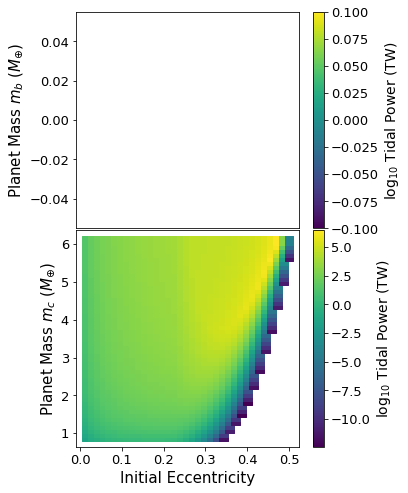

In [155]:
plt.figure(figsize = (5,8))
plt.subplot(2,1,1)
plt.scatter(summary_listb['ecc_b'] , -1 * summary_listb['mass_b'],  marker = "s", s = 80, c= np.log10(summary_listb['PowerEqtidef_b']), )
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
cbar.set_label(label="log$_{10}$ Tidal Power (TW)", fontsize=14)
plt.xticks([],[], fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel("Planet Mass $m_{b}$ ($M_{\oplus}$)", fontsize = 15)

### NEXT PLOT
plt.subplot(2,1,2)
plt.scatter(summary_listc['ecc_c'] , -1 * summary_listc['mass_c'],  marker = "s", s = 80, c= np.log10(summary_listc['PowerEqtidef_c']), )
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Initial Eccentricity", fontsize = 15)
plt.ylabel("Planet Mass $m_{c}$ ($M_{\oplus}$)", fontsize = 15)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
cbar.set_label(label="log$_{10}$ Tidal Power (TW)", fontsize=14)
plt.subplots_adjust(hspace=0.01)
plt.savefig("Figures/thermmag_extra1.png", dpi = 150, bbox_inches = 'tight')

/Users/jcbecker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


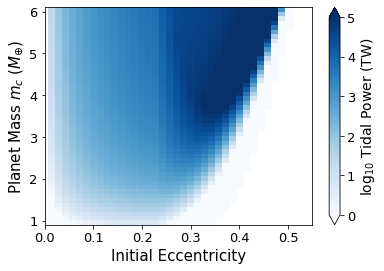

In [156]:
plt.scatter(summary_listc['ecc_c'] , -1 * summary_listc['mass_c'],  marker = "s", 
            s = 50, c= np.log10(summary_listc['PowerEqtidef_c']), cmap = "Blues", vmin = 0, vmax = 5)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Initial Eccentricity", fontsize = 15)
plt.ylabel("Planet Mass $m_{c}$ ($M_{\oplus}$)", fontsize = 15)
cbar = plt.colorbar( extend='both',)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
cbar.set_label(label="log$_{10}$ Tidal Power (TW)", fontsize=14)
manual_locations = [(0.3, .3), (.11,.2)]
#plt.clabel(cbar ,[12,14],use_clabeltext = True, fmt = {12:"Earth Analog", 14:"Io Analog"}, fontsize=14)#, manual=manual_locations)
plt.xlim(0,0.55)
plt.ylim(0.9, 6.1) # only show 
plt.savefig("Figures/thermmag_figure3.png", dpi = 150, bbox_inches = 'tight')

A parameter sweep computing the tidal power after 7.2 Gyr for a range of eccentricity (sampled between 0 and 0.7) and mass of LP 980-9 c (sampled over the $2\sigma$ error bounds, 0.9 - 6.1 $M_{\oplus}$) for a interior structure corresponding to an initial tidal $Q = 17$. For comparison, Io's tidal power is $\sim10^{3}$ TW. The white region of the plot indicates no tidal power after 7.2 Gyr, which occurs because for that set of parameters the planetary orbit would have circularized by that time. For larger planetary eccentricities and planet masses, the tidal power after 7.2 Gyr remains substantial and would provide significant surface heating. An analogous plot for LP 980-9 b was also constructed, but is not presented because all tested orbits circularized by the end of the integrations and tidal power was consequently uniformly 0.



# Checks
Let's look at a couple of the eccentricity and semi-major axis evolutions from the previous figure, just to see what's going on. 

For context, the tidal circularization (in the low-eccentricity approximation) timescale is:
$     t_{circ} = e_0 \, \bigg(\frac{de}{dt} \bigg)^{-1} = \frac{2}{21 }\frac{Q_{p}}{k_{2}} \,\frac{m_{p} a^{13/2}}{M_{\star}^{3/2} G^{1/2} r_{p}^{5}}.$

The parameters that will affect the circularization timescale in order of importance are: (1) the semi-major axis, which scales with a factor of $a^{-13/2}$, so if the orbit decays inwards due to tides it will circularize faster, (2) the tidal Q and planet mass. The planet mass will not change enough to make a huge difference (in our integrations, it doesn't change at all - see the work of the AtmEsc module for that), but Q will change as the interior responds to the tidal forcing. 

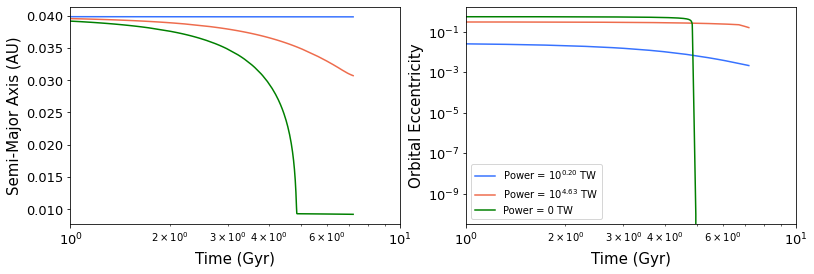

In [157]:
cases = ['test_bmass04_becc02/', 'test_bmass24_becc22/', 'test_bmass40_becc40/']
plt.figure(figsize = (13,4))
colz = [blue_col, orange_col, "green", "pink"]

for i, item in enumerate(cases):
    datac_local = pd.read_csv("ParameterSweep_highres_dec22c/" + item + "tidalearth.c.forward", names=names, delim_whitespace=True)
    plt.subplot(1,2,1)
    plt.plot(datac_local['Time'],datac_local['SemiMajorAxis'],color=colz[i],)
    plt.ylabel(r'Semi-Major Axis (AU)', fontsize = 15)
    plt.xlabel('Time (Gyr)', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    #plt.ylim(0,0.10)
    plt.xlim(1, 10)
    plt.xscale('log')

    plt.subplot(1,2,2)
    if datac_local['PowerEqtide'].values[-1] ==0:
        plt.plot(datac_local['Time'],datac_local['Eccentricity'],color=colz[i], label = "Power = 0 TW")
    else:
        plt.plot(datac_local['Time'],datac_local['Eccentricity'],color=colz[i], label = "Power = 10$^{%0.2f}$ TW" % np.log10(datac_local['PowerEqtide'].values[-1]))
    plt.ylabel(r'Orbital Eccentricity', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Time (Gyr)', fontsize = 15)
    plt.xlim(1, 10)

    #plt.ylim(1e-5,1)
    plt.yscale('log'); plt.xscale('log')
plt.legend(loc='lower left',frameon=True,ncol=1,columnspacing=1)

plt.savefig("Figures/thermmag_extra2.png", dpi = 150, bbox_inches = 'tight')

Sure enough, the case where tidal power is 0 at the end occurs when the orbit circularizes and shrinks. this is not really consistent with the current-day orbit - earlier, we stated that the current day eccentricties are probably not more than 0.3 since if both planets had $e=0.3$ the orbits would physically cross each other. So, these large $e$ cases are not very likely in this system. 